If you want to work with many pixels at a time, you need to create **Region of Image (ROI)**. <br>In this section, you will learn how to do this. Finally, you will learn how to split and merge images. 

**Remember that** in Python, images are represented as NumPy arrays. Therefore, most of the operations that are included in these examples are related to NumPy, so a good understanding about the NumPy package is required to both understand the code included in these examples and to write optimized code with OpenCV.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os
import cv2
import tensorflow as tf

# Set a universal seed for this notebook
# Reproducability
def seed(seeds=31415):
    np.random.seed(seeds)
seed()
print('Done!')

Done!


### Accessing and manipulating pixels in OpenCV with BGR images

Now, we are going to see how we can work with BGR images in OpenCV. OpenCV loads the color images so that:- 
* the blue channel is the first, 
* the green channel is the second, and 
* the red channel is the third.

In [2]:
os.listdir()

['.ipynb_checkpoints',
 '01.image_basics.ipynb',
 '02.pixels_channels_colors_images_colorSpaces,.ipynb',
 '03.accessing_and_manipulating_pixels.ipynb',
 'accessing_and_manipulating_images.py',
 'logo.png']

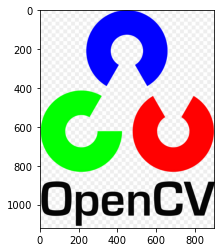

In [3]:
img = cv2.imread('logo.png')
plt.imshow(img)
plt.show()

* To get the dimensions of the image use img.shape
* img.shape returns a tuple of number of rows, columns and channels (if a colour image)
* If image is grayscale, img.shape returns a tuple of number of rows and columns.
* So,it can be used to check if loaded image is grayscale or color image.
* Get the shape of the image:
* if len shape >= 3 it's a color image
* Total number of elements is obtained by img.size:

In [4]:
im_shape = img.shape  # (Rows, Columns, Channel or No_Channel for Gray or B&W)
im_ndim = img.ndim
im_size = img.size  # (multiply all values in shape)
im_dtype = img.dtype  # The image data  type

print(f'Shape is: {im_shape}\nNdim is: {im_ndim}\nSize is: {im_size}\nDtype is: {im_dtype}')

Shape is: (1120, 900, 3)
Ndim is: 3
Size is: 3024000
Dtype is: uint8


In [5]:
print(1120 * 900 * 3)

3024000


#### Display the image with cv2

* The function cv2.imshow() is used to display an image in a window
* The first argument of this function is the window name
* The second argument of this function is the image to be shown.
* Each created window should have different window names.
* Show original image: cv2.imshow("original image", img)

In [8]:
# Run with cv2.waitKey(0) to see effect...

cv2.imshow('original-image', img)
cv2.waitKey(0)

-1

#### cv2.waitkey()

* The function cv2.waitKey(), which is a keyboard binding function, waits for any keyboard event.
* This function waits the value indicated by the argument (in milliseconds). 
* If any keyboard event is produced in this period of time, the program continues its execution
* If the value of the argument is 0, the program waits indefinitely until a keyboard event is produced:cv2.waitKey(0)

#### Accessing Pixel Values

* A pixel value can be accessed by row and column coordinates.
* In case of BGR image, it returns an array of (Blue, Green, Red) values.
* Get the value of the pixel (x=40, y=6):
* (b, g, r) = img[6, 40]  **`(This means get pixel at Row 6 and Column 40 of img)`**

In [16]:
(b,g,r) = img[6, 40]
b

255

### Accessing Only One Channel at a Time...

* We can only  access one channel at a time.
* In this case, we will use row, column and the index of the desired channel for indexing.
* Get only blue value of the pixel (x=40, y=6):
* b = img[6, 40, 0] **`(This means get pixel at Row 6 and Column 40 and Channel-Blue of img)`**

In [17]:
b = img[6, 40, 0]
b

255

#### Setting Pixel Channel...

The pixel values can be also modified in the same way. <br>Remember that it is the (b, g, r) format. For example, to set the pixel (x=40, y=6) to red, perform the following:

In [19]:
img[6, 40] = (0, 0, 255)
(b,g,r) = img[6,40]
print(b, g, r)  # We've set color on only the red channel of this pixel.

0 0 255


#### Slicing a region or section of an image...

Sometimes, you will have to deal with a certain region rather than one pixel. In this case, the ranges of the values should be provided instead of the individual values. For example, to get to the top-left corner of the image, enter the following:

In [21]:
top_left_corner = img[:50, :50]
cv2.imshow('Top-Left-Corner',top_left_corner)
cv2.waitKey(0)

-1

### Accessing and manipulating pixels in OpenCV with grayscale images

**The function cv2.imshow() is used to display an image in a window*

* The first argument of this function is the window name
* The second argument of this function is the image to be shown.
* In this case, the second argument is needed because we want to load the image in grayscale.
* Second argument is a flag specifying the way the image should be read.
* Value needed for loading an image in grayscale: 'cv2.IMREAD_GRAYSCALE'.

load OpenCV logo image:
* gray_img = cv2.imread('logo.png', cv2.IMREAD_GRAYSCALE)

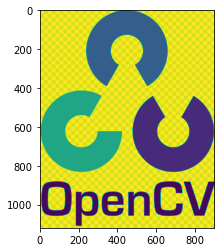

In [23]:
gray_img = cv2.imread('logo.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_img)
plt.show()

In [24]:
gray_shape = gray_img.shape  # (Rows, Columns, Channel or No_Channel for Gray or B&W)
gray_ndim = gray_img.ndim
gray_size = gray_img.size  # (multiply all values in shape)
gray_dtype = gray_img.dtype  # The image data  type

print(f'Shape is: {gray_shape}\nNdim is: {gray_ndim}\nSize is: {gray_size}\nDtype is: {gray_dtype}')

Shape is: (1120, 900)
Ndim is: 2
Size is: 1008000
Dtype is: uint8


The gray image has no color channels and it's 2 dimensional

A pixel value can be accessed by row and column coordinates. In grayscale images, only one value is obtained **(usually called the intensity of the pixel)**. For example, if we want to get the intensity of the pixel `(x=40, y=6)`, we would use the following code:

In [25]:
pix_val = gray_img[6, 40]
pix_val

255

The pixel values of the image can be also modified in the same way. For example, if we want to change the value of the pixel `(x=40, y=6)` to black (`intensity equals to 0`), we would use the following code:

In [26]:
gray_img[6, 40] = 0
pix_val = gray_img[6, 40]
pix_val

0